In [1]:
# Import necessary libraries
import pandas as pd

# Load the weather data
weather_data = pd.read_csv('/content/weatherData.csv')

# Load the location data
location_data = pd.read_csv('/content/locationData.csv')

# Display the first few rows of weather and location data
print("Weather Data:")
print(weather_data.head())

print("Location Data:")
print(location_data.head())


Weather Data:
   location_id      date  weather_code (wmo code)  temperature_2m_max (°C)  \
0            0  1/1/2010                        1                     30.1   
1            0  1/2/2010                       51                     30.1   
2            0  1/3/2010                       51                     29.6   
3            0  1/4/2010                        2                     28.9   
4            0  1/5/2010                        1                     28.1   

   temperature_2m_min (°C)  temperature_2m_mean (°C)  \
0                     22.6                      26.0   
1                     23.7                      26.3   
2                     23.1                      26.0   
3                     23.1                      25.7   
4                     21.3                      24.6   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                           34.5                           25.0   
1                           33.9              

In [2]:
# Merge the dataframes on 'location_id'
merged_data = pd.merge(weather_data, location_data, on='location_id')

# Display the merged dataframe
print("\nMerged Data:")
print(merged_data.head())



Merged Data:
   location_id      date  weather_code (wmo code)  temperature_2m_max (°C)  \
0            0  1/1/2010                        1                     30.1   
1            0  1/2/2010                       51                     30.1   
2            0  1/3/2010                       51                     29.6   
3            0  1/4/2010                        2                     28.9   
4            0  1/5/2010                        1                     28.1   

   temperature_2m_min (°C)  temperature_2m_mean (°C)  \
0                     22.6                      26.0   
1                     23.7                      26.3   
2                     23.1                      26.0   
3                     23.1                      25.7   
4                     21.3                      24.6   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                           34.5                           25.0   
1                           33.9              

In [3]:
# Define columns to drop
columns_to_drop = [
    'weather_code (wmo code)', 'daylight_duration (s)', 'sunshine_duration (s)',
    'latitude', 'longitude', 'elevation', 'utc_offset_seconds',
    'timezone', 'timezone_abbreviation', 'sunrise', 'sunset'
]

# Drop unnecessary columns
merged_data = merged_data.drop(columns=columns_to_drop)

# Display the updated merged data
print("\nMerged Data after dropping unnecessary columns:")
print(merged_data.head())



Merged Data after dropping unnecessary columns:
   location_id      date  temperature_2m_max (°C)  temperature_2m_min (°C)  \
0            0  1/1/2010                     30.1                     22.6   
1            0  1/2/2010                     30.1                     23.7   
2            0  1/3/2010                     29.6                     23.1   
3            0  1/4/2010                     28.9                     23.1   
4            0  1/5/2010                     28.1                     21.3   

   temperature_2m_mean (°C)  apparent_temperature_max (°C)  \
0                      26.0                           34.5   
1                      26.3                           33.9   
2                      26.0                           34.5   
3                      25.7                           31.7   
4                      24.6                           30.0   

   apparent_temperature_min (°C)  apparent_temperature_mean (°C)  \
0                           25.0         

In [4]:
# Check for missing values
print("\nMissing values in each column before handling:")
print(merged_data.isnull().sum())

# Fill missing values (forward fill)
merged_data.fillna(method='ffill', inplace=True)

# Check again for missing values
print("\nMissing values after handling:")
print(merged_data.isnull().sum())



Missing values in each column before handling:
location_id                        0
date                               0
temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
temperature_2m_mean (°C)           0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
apparent_temperature_mean (°C)     0
precipitation_sum (mm)             0
rain_sum (mm)                      0
precipitation_hours (h)            0
wind_speed_10m_max (km/h)          0
wind_gusts_10m_max (km/h)          0
wind_direction_10m_dominant (°)    0
shortwave_radiation_sum (MJ/m²)    0
et0_fao_evapotranspiration (mm)    0
city_name                          0
dtype: int64

Missing values after handling:
location_id                        0
date                               0
temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
temperature_2m_mean (°C)           0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
apparent_temperatur

<ipython-input-4-0403b78aa286>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


In [5]:
# Perform one-hot encoding on 'city_name'
merged_data = pd.get_dummies(merged_data, columns=['city_name'], drop_first=True)

# Display the updated merged data
print("\nMerged Data after One-Hot Encoding:")
print(merged_data.head())



Merged Data after One-Hot Encoding:
   location_id      date  temperature_2m_max (°C)  temperature_2m_min (°C)  \
0            0  1/1/2010                     30.1                     22.6   
1            0  1/2/2010                     30.1                     23.7   
2            0  1/3/2010                     29.6                     23.1   
3            0  1/4/2010                     28.9                     23.1   
4            0  1/5/2010                     28.1                     21.3   

   temperature_2m_mean (°C)  apparent_temperature_max (°C)  \
0                      26.0                           34.5   
1                      26.3                           33.9   
2                      26.0                           34.5   
3                      25.7                           31.7   
4                      24.6                           30.0   

   apparent_temperature_min (°C)  apparent_temperature_mean (°C)  \
0                           25.0                     

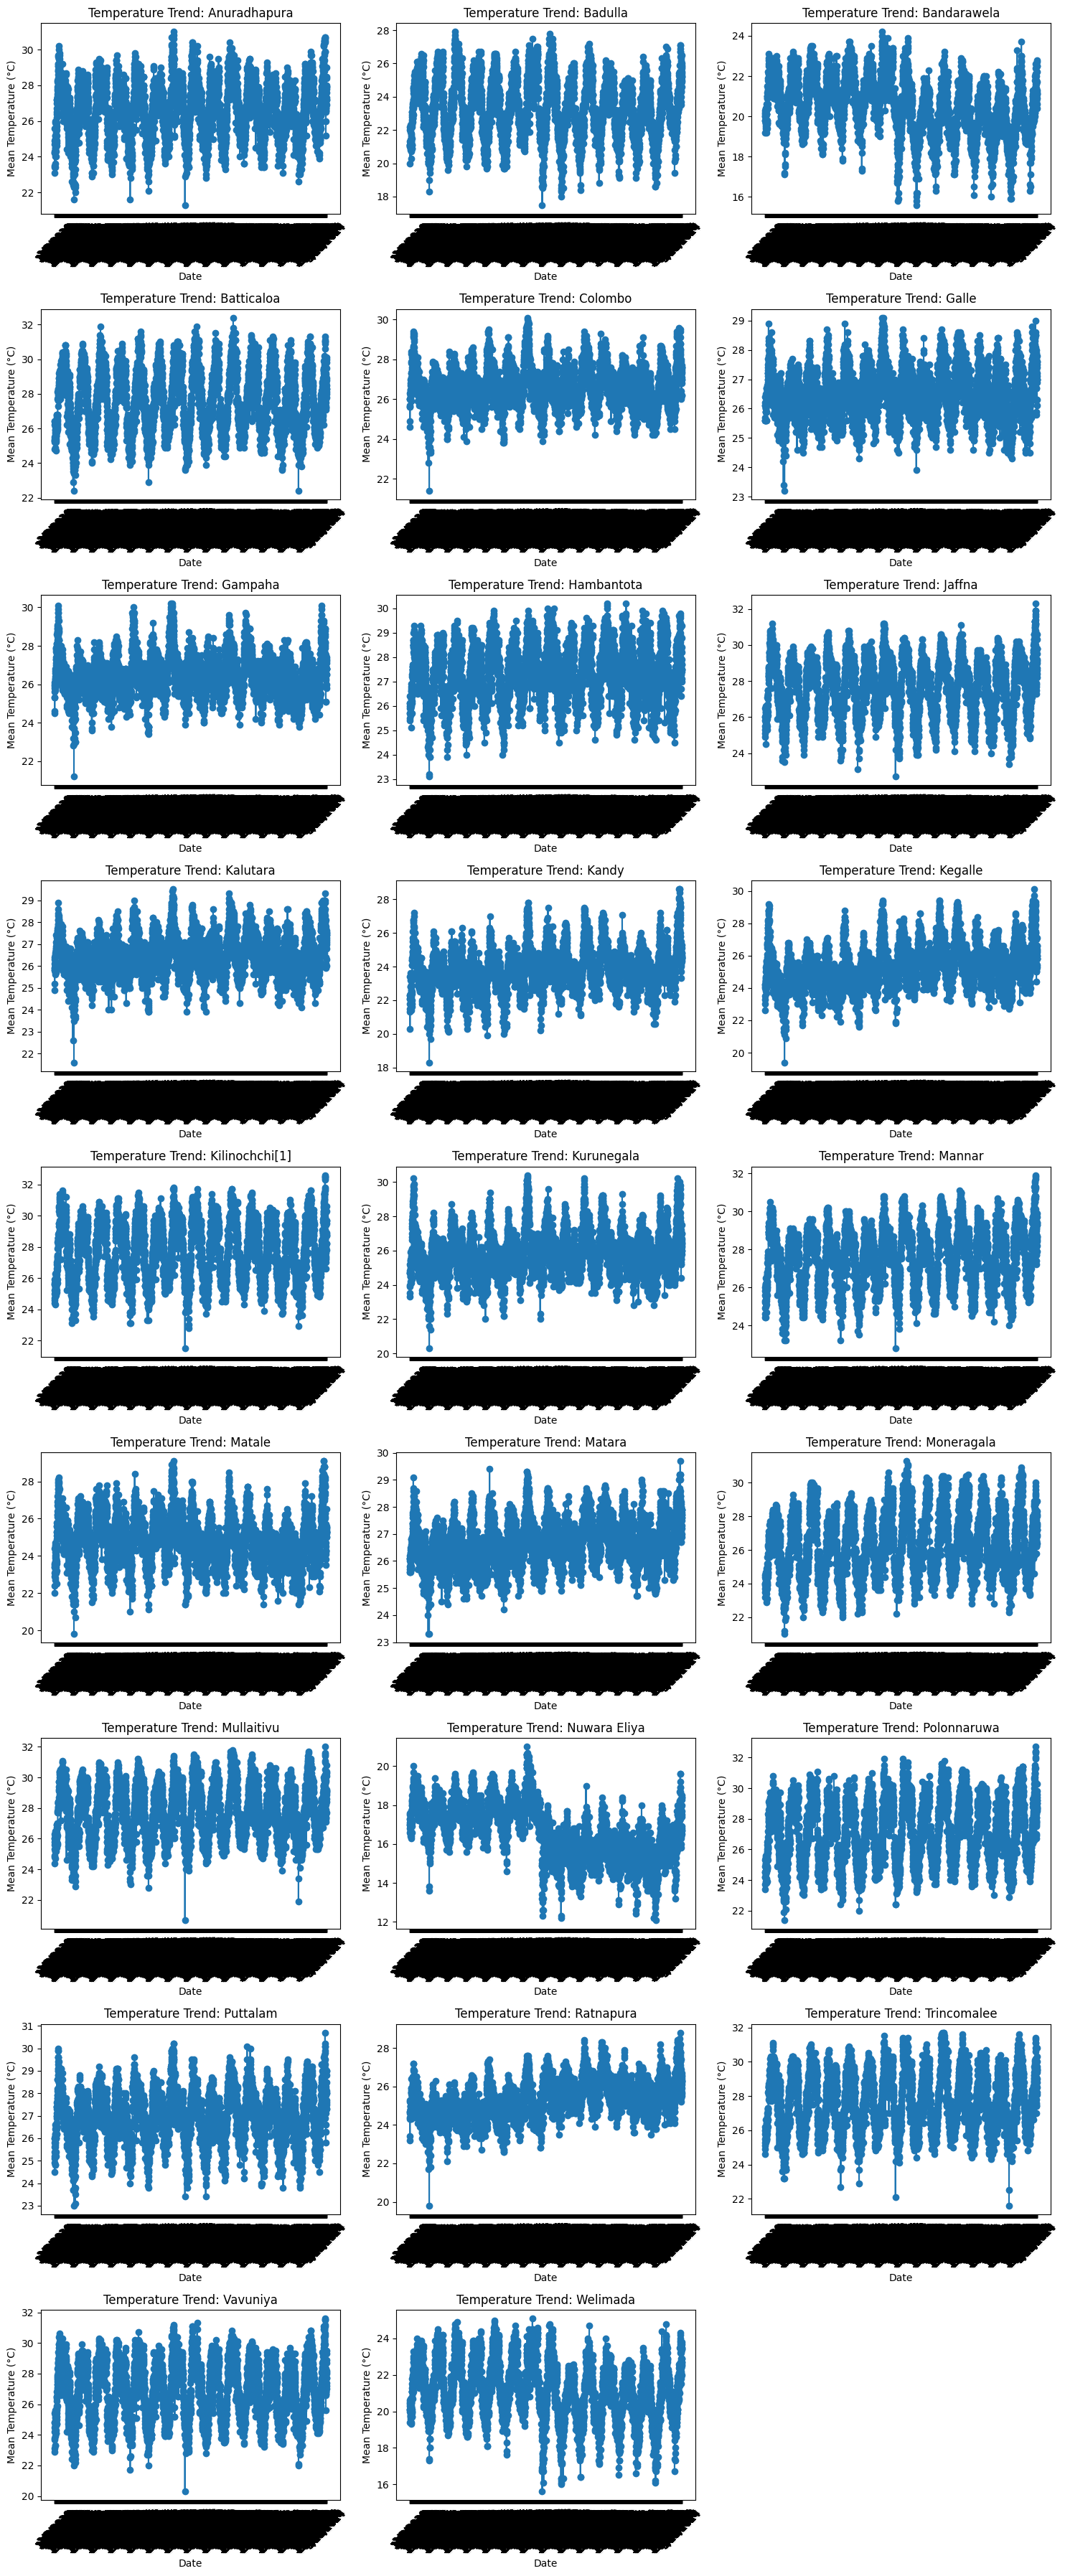

In [6]:
import matplotlib.pyplot as plt

# List all the one-hot encoded city columns
city_columns = [col for col in merged_data.columns if 'city_name_' in col]

# Set the number of rows and columns for subplots
n_cols = 3
n_rows = (len(city_columns) // n_cols) + (len(city_columns) % n_cols > 0)

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs = axs.flatten()

# Plot each city
for i, city in enumerate(city_columns):
    city_data = merged_data[merged_data[city] == 1]
    axs[i].plot(city_data['date'], city_data['temperature_2m_mean (°C)'], label=city, marker='o')
    axs[i].set_title(f"Temperature Trend: {city.split('_')[-1]}")
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Mean Temperature (°C)')
    axs[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


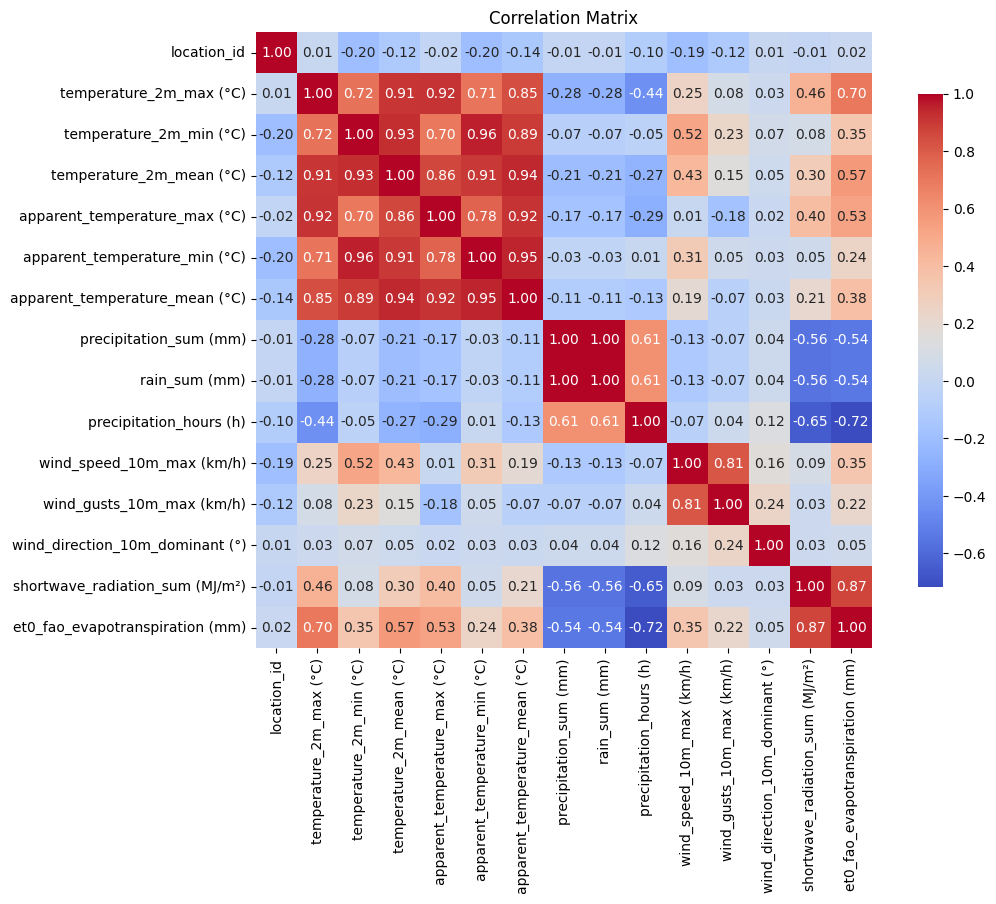

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format if not already done
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Ensure to include only numeric columns for correlation matrix
# Drop date and one-hot encoded city columns
weather_features = merged_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = weather_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Define the features and target
features = [
    'temperature_2m_min (°C)', 'temperature_2m_max (°C)',
    'apparent_temperature_min (°C)', 'apparent_temperature_max (°C)',
    'precipitation_sum (mm)', 'rain_sum (mm)'
]
city_columns = [col for col in merged_data.columns if 'city_name_' in col]
features.extend(city_columns)

# Target variable
target = 'temperature_2m_mean (°C)'


In [11]:
# Scale the features and target
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(merged_data[features])
scaled_target = scaler.fit_transform(merged_data[[target]])

# Display the scaled data
print(scaled_features[:5])
print(scaled_target[:5])


[[6.92000000e-01 6.10687023e-01 6.84523810e-01 6.69515670e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.36000000e-01 6.10687023e-01 7.17261905e-01 6.52421652e-01
  3.10752020e-04 3.10752020e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.12

In [48]:
train_size = int(len(scaled_features) * 0.8)

# Split data into training and testing sets
X_train, X_test = scaled_features[:train_size], scaled_features[train_size:]
y_train, y_test = scaled_target[:train_size], scaled_target[train_size:]

# Check the shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (113896, 32)
y_train shape: (113896, 1)
X_test shape: (28475, 32)
y_test shape: (28475, 1)


In [49]:
# Reshape the data to be compatible with Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"Reshaped X_train: {X_train.shape}")
print(f"Reshaped X_test: {X_test.shape}")


Reshaped X_train: (113896, 32, 1)
Reshaped X_test: (28475, 32, 1)


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, SimpleRNN, Dense, Dropout

# Define the RCNN model
model = Sequential()

# Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# Recurrent Layer
model.add(SimpleRNN(50, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected layers
model.add(Dense(25, activation='relu'))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 30, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,307 (28.54 KB)

 Trainable params: 7,307 (28.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [53]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - loss: 4.5721e-04 - val_loss: 7.7860e-04
Epoch 2/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 3.5598e-04 - val_loss: 6.6626e-04
Epoch 3/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 3.2752e-04 - val_loss: 5.5142e-04
Epoch 4/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 3.0877e-04 - val_loss: 4.1962e-04
Epoch 5/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 2.9337e-04 - val_loss: 3.6468e-04
Epoch 6/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 2.8257e-04 - val_loss: 4.3701e-04
Epoch 7/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 2.7243e-04 - val_loss: 4.9471e-04
Epoch 8/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - loss: 2.6965e-04 - val_loss: 4.5372e-04
Epoch 9/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 2.6927e-04 - val_loss: 3.7837e-04
Epoch 10/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 2.5677e-04 - val_loss: 5.7656e-04


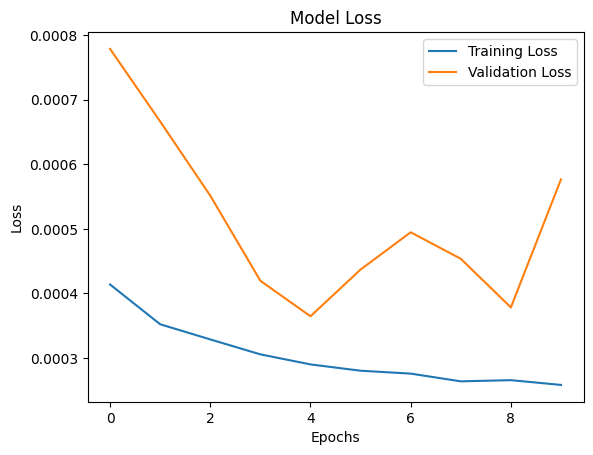

In [54]:
import matplotlib.pyplot as plt

# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [55]:
# Make predictions
predicted_temperatures = model.predict(X_test)

# Inverse scaling of predictions
predicted_temperatures = scaler.inverse_transform(predicted_temperatures)

# Inverse scaling of y_test
y_test_original = scaler.inverse_transform(y_test)


890/890 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [56]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test_original, predicted_temperatures)
rmse = mse ** 0.5
r_squared = r2_score(y_test_original, predicted_temperatures)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r_squared:.4f}')


MSE: 0.0520
RMSE: 0.2281
R²: 0.9670


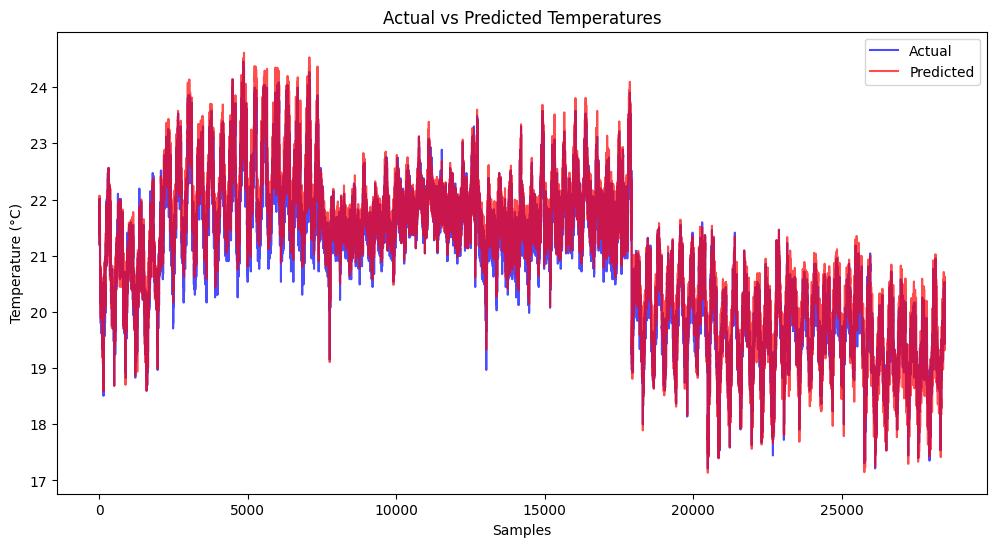

In [57]:
# Plot actual vs predicted temperatures
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual', color='blue', alpha=0.7)
plt.plot(predicted_temperatures, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted Temperatures')
plt.xlabel('Samples')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


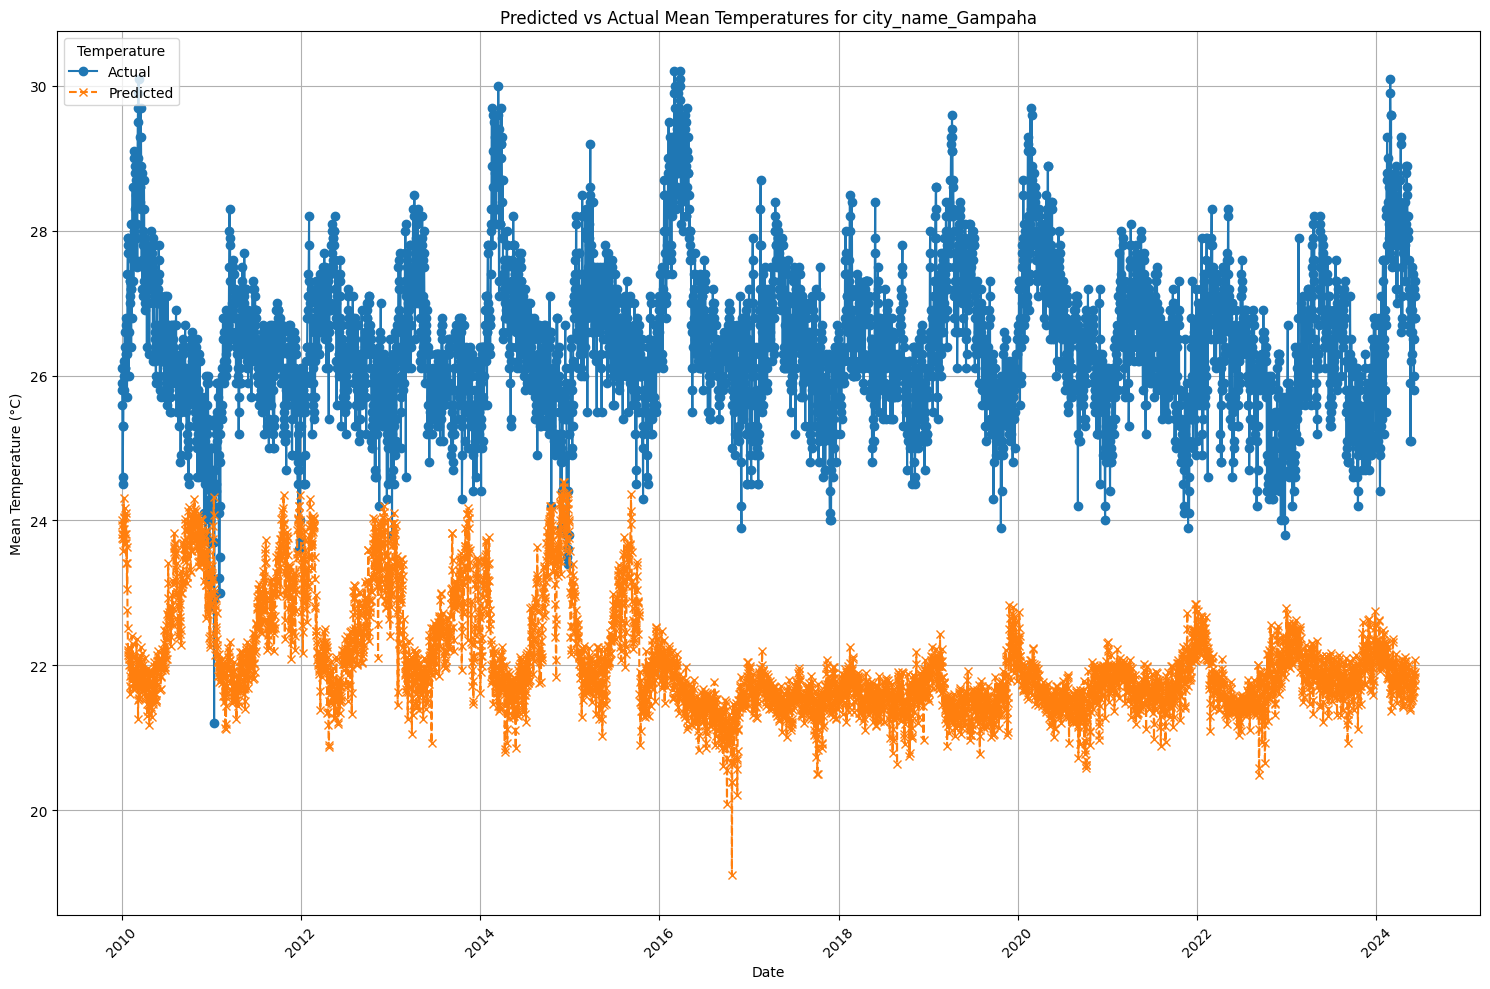

In [77]:
import matplotlib.pyplot as plt

# Specify the city you want to visualize
target_city = 'city_name_Gampaha'  # Change this to the desired city name

# Check if the target city exists in the merged data
if target_city not in merged_data.columns:
    print(f"{target_city} does not exist in the merged data columns.")
else:
    # Filter the data for the specified city
    city_data = merged_data[merged_data[target_city] == 1]

    # Check if there is data for the specified city
    if city_data.empty:
        print(f"No data available for {target_city}.")
    else:
        # Get actual temperatures for the specified city
        actual_temperatures = city_data['temperature_2m_mean (°C)'].values

        # Get corresponding predicted temperatures based on the date index
        predictions_for_city = predicted_temperatures[city_data.index]

        # Create a figure for plotting
        plt.figure(figsize=(15, 10))

        # Plotting the actual vs predicted temperatures
        plt.plot(city_data['date'], actual_temperatures, label='Actual', marker='o', linestyle='-')
        plt.plot(city_data['date'], predictions_for_city, label='Predicted', marker='x', linestyle='--')

        # Customize the plot
        plt.title(f'Predicted vs Actual Mean Temperatures for {target_city}')
        plt.xlabel('Date')
        plt.ylabel('Mean Temperature (°C)')
        plt.xticks(rotation=45)
        plt.legend(title='Temperature', loc='upper left')
        plt.tight_layout()
        plt.grid()
        plt.show()


In [78]:
from tensorflow.keras.models import load_model

# Save the model
model.save('rcnn_weather_model.h5')

# Load the model (if needed)
# loaded_model = load_model('rcnn_weather_model.h5')


In [79]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_original, predicted_temperatures)
print(f'Mean Absolute Error (MAE): {mae:.4f}')


Mean Absolute Error (MAE): 0.1893
